# Task No 5 - EDA on ILP data

Main aim of this task is to find out the most successful teams, players and factors contributing win or loss of a team.

**Author : Shahzad Abbas**

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (12, 6)

In [94]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading Data

In [95]:
path1 = r"D:\CHAND's DATA\Study data\Additional Work\Data Science\Spark Foundation Internship\Task 5\deliveries.csv"
path2 = r"D:\CHAND's DATA\Study data\Additional Work\Data Science\Spark Foundation Internship\Task 5\matches.csv"
df_del = pd.read_csv(path1)
df_mat = pd.read_csv(path2, index_col="id")
df_mat.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [96]:
df_mat.shape

(756, 17)

In [97]:
df_mat.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [98]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory us

## Data Preprocessing

In [99]:
df_mat.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [100]:
df_mat.drop("umpire3", axis=1, inplace=True)

In [101]:
df_mat.dropna(inplace=True)

In [102]:
df_mat.shape

(743, 16)

In cleaning process we just lost 12 entries.

## Analysis

In [103]:
def per_on_bar(plot,feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [104]:
px.pie(df_mat, "season", values="season", hover_data=["season"], hole=0.4, )

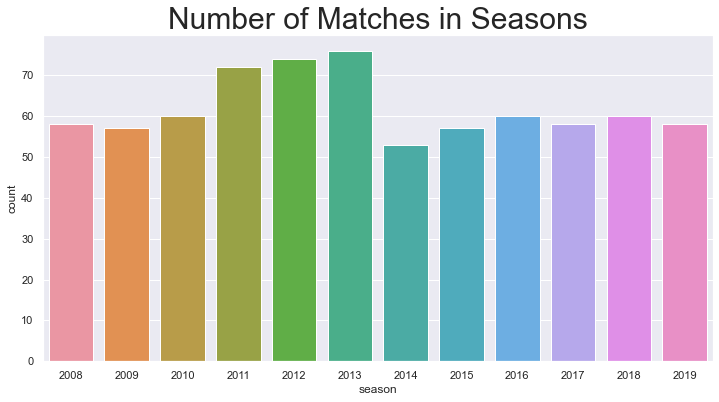

In [105]:
sns.countplot(df_mat.season)
plt.title("Number of Matches in Seasons", fontsize=30)
plt.show()

In [106]:
px.pie(df_mat, "city", hole=0.5, title="Ground Cities")

In [107]:
## Function to plot stacked bar chart
def stacked_plot(x, y):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,y,margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,y,normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.show()

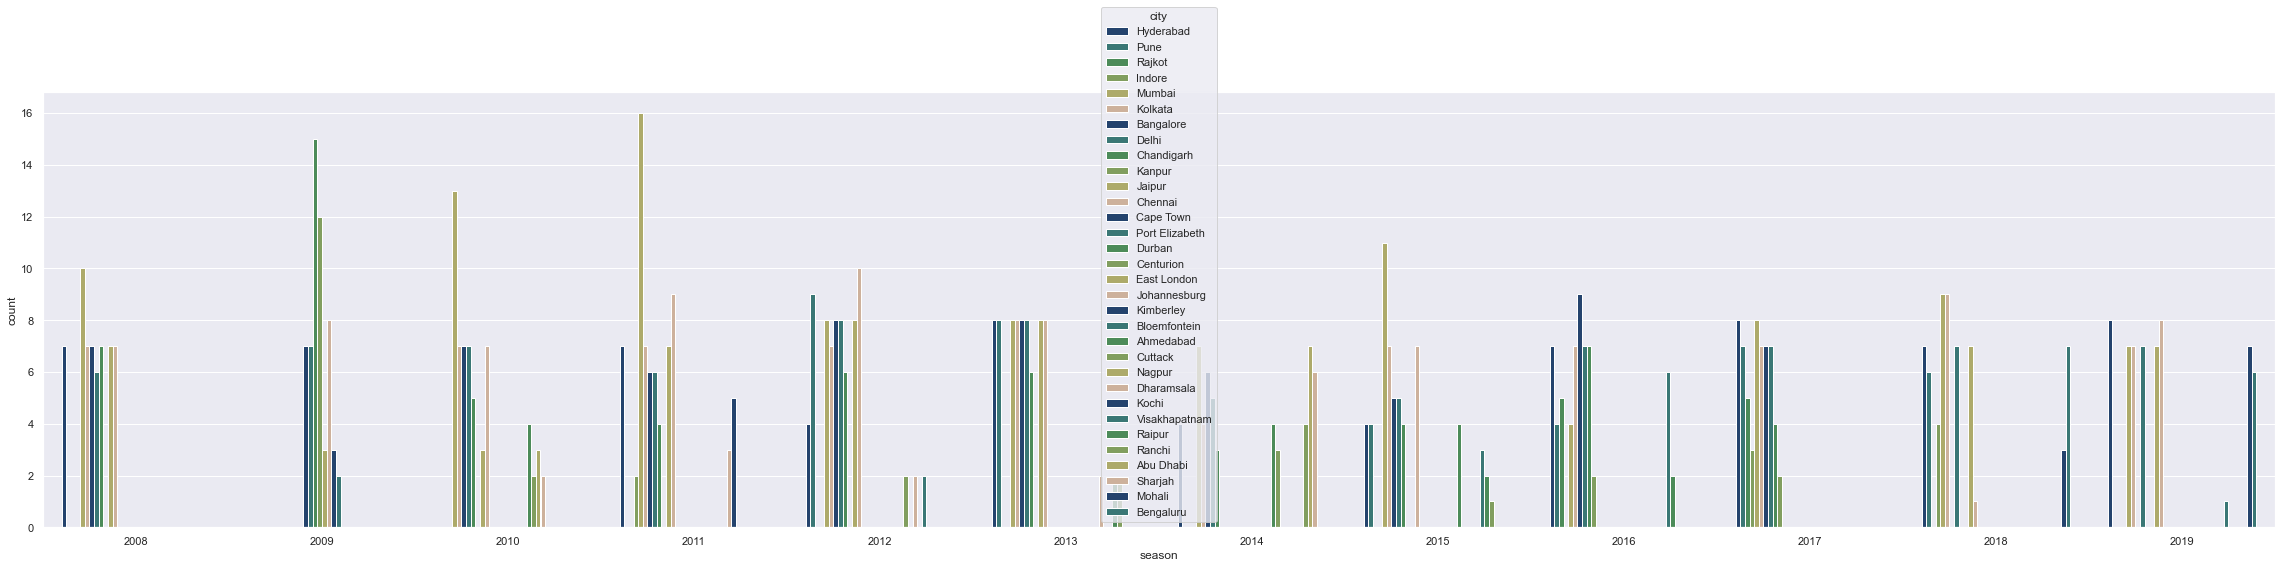

In [108]:
plt.figure(figsize=(40, 8))
sns.countplot(df_mat.season, hue=df_mat.city, palette=sns.palettes.color_palette("gist_earth"))
plt.show()

In [109]:
df_mat.winner.describe()

count                743
unique                15
top       Mumbai Indians
freq                 109
Name: winner, dtype: object

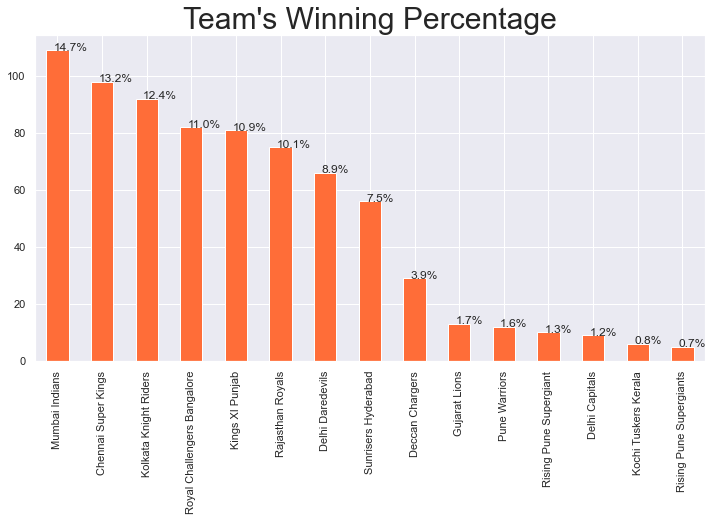

In [110]:
sns.set(palette='rainbow_r')
plt.xticks(rotation=90)
plt.title("Team's Winning Percentage", fontsize=30)
ax = df_mat.winner.value_counts().plot(kind="bar")
per_on_bar(ax, df_mat.winner)
plt.show()

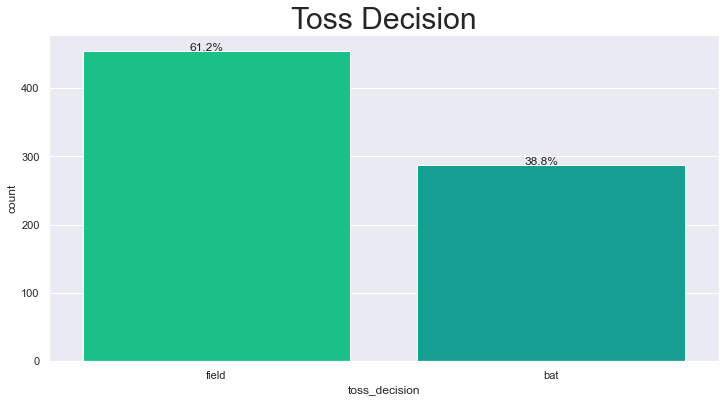

In [111]:
plt.title("Toss Decision", fontsize=30)
ax = sns.countplot(df_mat.toss_decision, palette=sns.palettes.color_palette("winter_r"))
per_on_bar(ax, df_mat.toss_decision)

In [112]:
df_mat[df_mat.win_by_runs==146][["winner", "player_of_match", "win_by_runs"]]

,winner,player_of_match,win_by_runs
id,,,
44,Mumbai Indians,LMP Simmons,146


Mumbai Indian were the tream that **WON** by maximum score of 146.

In [113]:
df_mat[df_mat.win_by_wickets==10][["winner", "player_of_match", "win_by_wickets"]]

,winner,player_of_match,win_by_wickets
id,,,
3,Kolkata Knight Riders,CA Lynn,10
35,Kings XI Punjab,Sandeep Sharma,10
72,Deccan Chargers,AC Gilchrist,10
120,Delhi Daredevils,DL Vettori,10
184,Royal Challengers Bangalore,JH Kallis,10
299,Rajasthan Royals,SR Watson,10
377,Mumbai Indians,DR Smith,10
391,Chennai Super Kings,MEK Hussey,10
543,Royal Challengers Bangalore,VR Aaron,10


These were the teams who won the match by maximum wickets **10**.

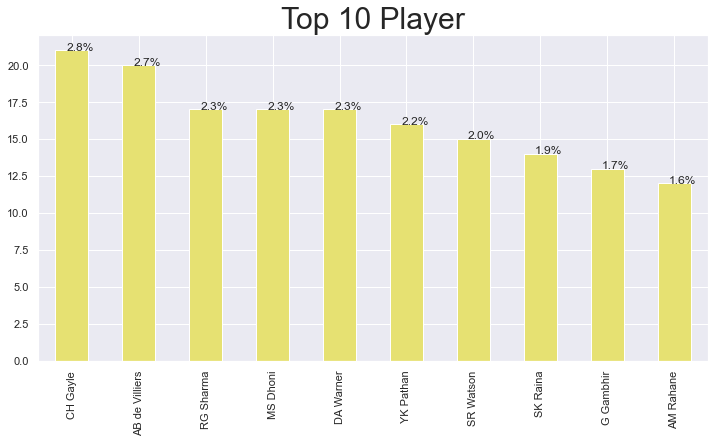

In [114]:
plt.title("Top 10 Player", fontsize=30)
sns.set_palette("CMRmap_r")
ax = df_mat.player_of_match.value_counts().iloc[0:10].plot(kind="bar")
per_on_bar(ax, df_mat.player_of_match)
plt.show()

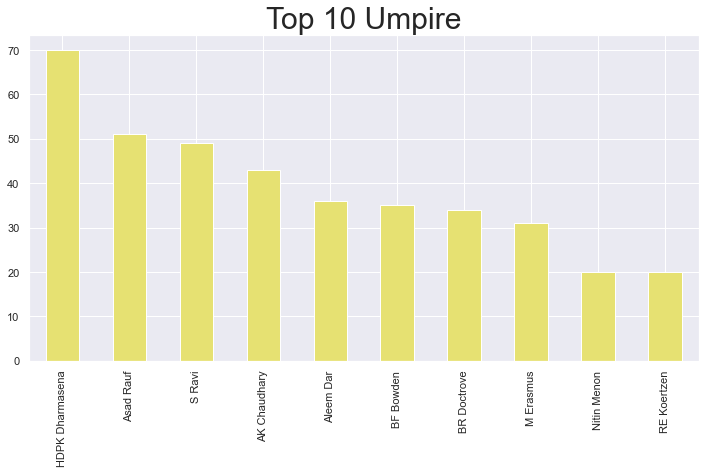

In [115]:
plt.title("Top 10 Umpire", fontsize=30)
ax = df_mat.umpire1.value_counts().iloc[0:10].plot(kind="bar")